In [1]:
# imports
import keras
import numpy as np
import pandas as pd
import torch_cnn as tcnn
from keras_cnn import keras_CNN as kcnn
import data_processing as d
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split   

In [2]:
# Data retieval
X, y = d.get_encoded_data()

# Keras CNN Data
X_train, X_test, y_train, y_test = d.splitData(X, y)

# Convert data to Tensors to Incease Computation time for Torch CNN
X_tensor_train,Y_tensor_train  = d.toTensors(X, y)

# Change Y data for SVM
svm_X_train, svm_X_test, svm_y_train, svm_y_test =  train_test_split(X, d.get_SVM_y(), test_size=0.33, random_state=1)

In [3]:
# Variables
EPOCHS = 10 # arbitrary

# Keras CNN
KERNEL_SIZE = 3
FILTERS = 128
DROPOUT_RATE = 0.25

# Torch CNN
N_FEATURES = X_train.shape[1] # Number of features for the input layer
NUM_ROWS_TRAINING = X_train.shape[0] # Number of rows
N_HIDDEN = N_FEATURES * 10 # Size of first linear layer
N_CNN_KERNEL, MAX_POOL_KERNEL = 3, 4 # CNN kernel size

In [4]:
# Keras CNN

#Build Model
cnn1D = kcnn(7, 500)
new_X_train, new_X_test, new_y_train, new_y_test = cnn1D.reshape_and_chng_type(X_train, X_test, y_train, y_test)
model = cnn1D.getModel()
optimizer = keras.optimizers.Nadam(learning_rate=1e-3, decay=5e-4)

model.compile(optimizer, 'mse', metrics=[keras.metrics.Accuracy()])

history = model.fit(
    new_X_train,
    new_y_train,
    batch_size=256,
    verbose=1,
    epochs=150
)

# for metric in history.history:
#     cnn1D.plot(history.history, EPOCHS, metric)

print("Evaluate on test data")
results = model.predict(new_X_test, batch_size=256)
results = results.reshape(results.shape[1], results.shape[2]).astype(int)
count = failures = successes = 0
for i in range(len(results)):
    for j in range(len(results[i])):
        count += 1
        if results[i][j] == int(y_test[i][j]):
            successes += 1

print("test acc:", float(successes) / count)

Epoch 1/150
1/1 [==============================] - 1s 651ms/step - loss: 0.1397 - accuracy: 0.7642
Epoch 2/150
1/1 [==============================] - 0s 20ms/step - loss: 0.1382 - accuracy: 0.7606
Epoch 3/150
1/1 [==============================] - 0s 20ms/step - loss: 0.1351 - accuracy: 0.7600
Epoch 4/150
1/1 [==============================] - 0s 20ms/step - loss: 0.1339 - accuracy: 0.7637
Epoch 5/150
1/1 [==============================] - 0s 19ms/step - loss: 0.1298 - accuracy: 0.7638
Epoch 6/150
1/1 [==============================] - 0s 20ms/step - loss: 0.1267 - accuracy: 0.7703
Epoch 7/150
1/1 [==============================] - 0s 19ms/step - loss: 0.1231 - accuracy: 0.7749
Epoch 8/150
1/1 [==============================] - 0s 19ms/step - loss: 0.1189 - accuracy: 0.7739
Epoch 9/150
1/1 [==============================] - 0s 17ms/step - loss: 0.1139 - accuracy: 0.7833
Epoch 10/150
1/1 [==============================] - 0s 21ms/step - loss: 0.1091 - accuracy: 0.7910
Epoch 11/150
1/1 [

step 1 acc = 0.9319904189735736, loss = 8.001859268526328, roc_auc = 0.6463745225027601 

step 2 acc = 0.9039934032277065, loss = 20.780538770396713, roc_auc = 0.5496591598732482 

step 3 acc = 0.9617308673970236, loss = 7.279636240090686, roc_auc = 0.587025246053638 

step 4 acc = 0.9668669258255782, loss = 6.8059849432380055, roc_auc = 0.575188384266266 

step 5 acc = 0.9744139474614206, loss = 5.638496693547372, roc_auc = 0.5612126345019137 

step 6 acc = 0.9767542309655632, loss = 5.20171144542918, roc_auc = 0.5697228110611268 

step 7 acc = 0.977264695488279, loss = 5.075206158780638, roc_auc = 0.5843688990116606 

step 8 acc = 0.9802646562217772, loss = 4.405110812807886, roc_auc = 0.5905287319043336 

step 9 acc = 0.9808300938469392, loss = 4.274713510880366, roc_auc = 0.5955116179296361 

step 10 acc = 0.9810421329563749, loss = 4.23219927154432, roc_auc = 0.5975984700923689 



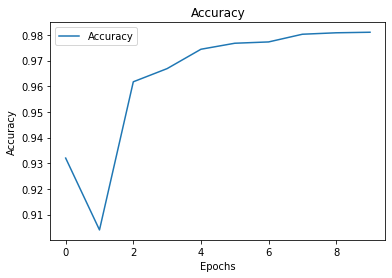

In [5]:
### Torch CNN
# Build CNN
net = tcnn.CNN(n_feature=N_FEATURES, n_hidden=N_HIDDEN, n_output=13, n_cnn_kernel=N_CNN_KERNEL)   # define the network    
# Train and Test
train_results, results = tcnn.trainTestCNN(net,X_tensor_train,Y_tensor_train, EPOCHS)
# Plotting
d.plot(results, 10, "Accuracy")

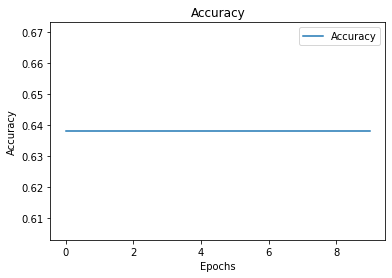

In [6]:
# SVM
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel='rbf'))
accuracy = []
# Train and Test
for x in range(0,EPOCHS):
    clf.fit(svm_X_train,  svm_y_train)
    predictions=clf.predict(svm_X_test)
    accuracy.append(accuracy_score(svm_y_test, predictions))
# Plotting        
results = {'Accuracy':accuracy}
d.plot(results, 10, 'Accuracy')       